<h2 style="text-align:center; color:#4CAF50">Group Partners:</h2>
<ul style="list-style-type:none; padding-left: 0; text-align:center;">
    <li style="margin-bottom: 10px; font-size: 18px;">Muhammad Hamza _ 22F-3134</li>
    <li style="margin-bottom: 10px; font-size: 18px;">Abdul Hanan _ 22F-3104</li>
</ul>

In [ ]:
from libs.search import *
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
def plot_NQueens(solution, fig=None):
    n = len(solution)
    board = np.array([2 * int((i + j) % 2) for j in range(n) for i in range(n)]).reshape((n, n))
    im = Image.open('images/queen_s.png')
    height = im.size[1]
    im = np.array(im).astype(float) / 255
    fig = plt.figure(figsize=(7, 7)) if fig is None else fig
    ax = fig.add_subplot(111)
    ax.set_title('{} Queens'.format(n))
    plt.imshow(board, cmap='binary', interpolation='nearest')
    if isinstance(solution, dict):
        for (k, v) in solution.items():
            newax = fig.add_axes([0.064 + (k * 0.112), 0.062 + ((n - v) * 0.112), 0.1, 0.1], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    elif isinstance(solution, list):
        for (k, v) in enumerate(solution):
            l = 7/n
            newax = fig.add_axes([0.064 + (k * 0.896/n),((n - v) * 0.896/n) - 0.5/n + n*0.002, 0.8/n, 0.8/n], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    fig.tight_layout()
    plt.show()

### Successor function:

In [11]:
def conflicts(state):
    n = len(state)
    conflicts = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
                conflicts += 1
                
    return conflicts

def successor(state):
    successors = []
    n = len(state)
    
    for i in range(n):
        for j in range(n):
            if j != state[i]:
                successor_state = list(state)
                successor_state[i] = j
                successors.append(successor_state)
                
    return successors


## Hill Climb Algorithm

C:\Users\gamer\AppData\Local\Temp\ipykernel_11112\2925873213.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


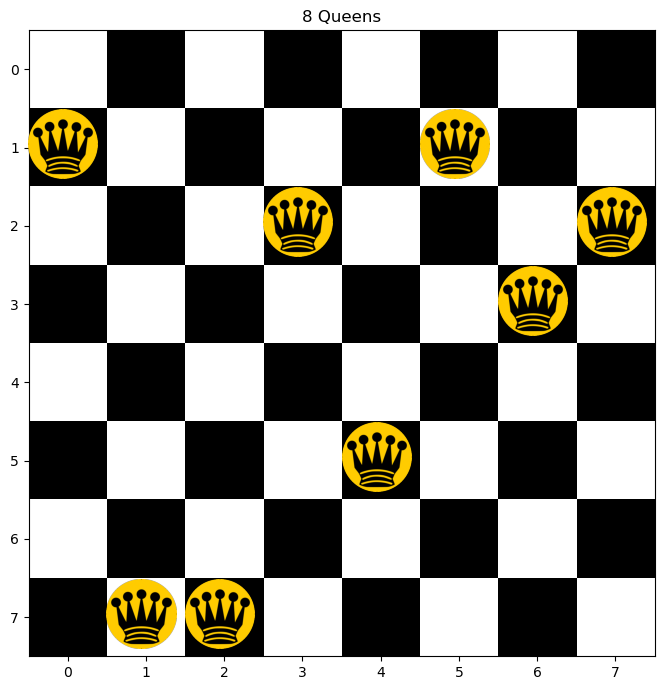

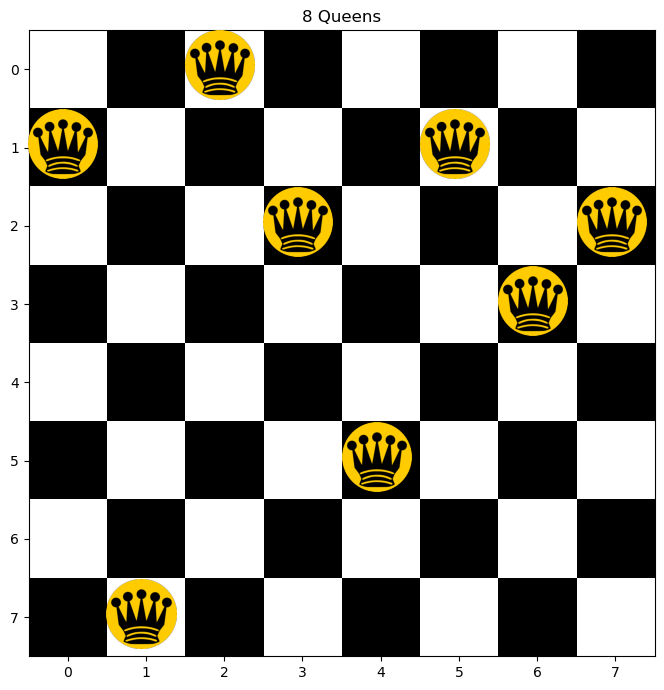

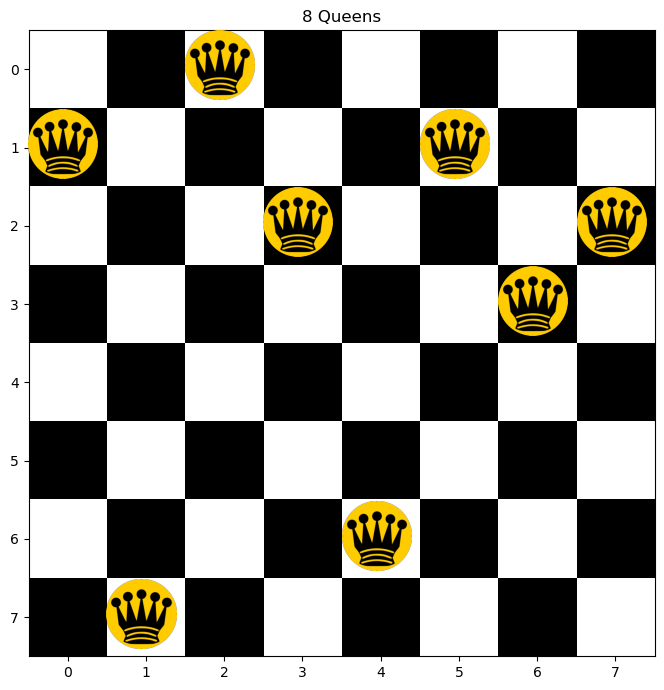

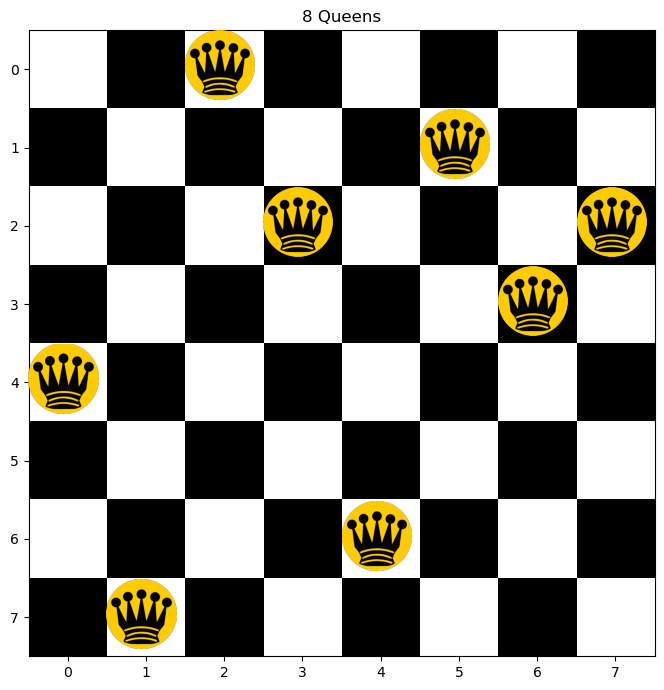

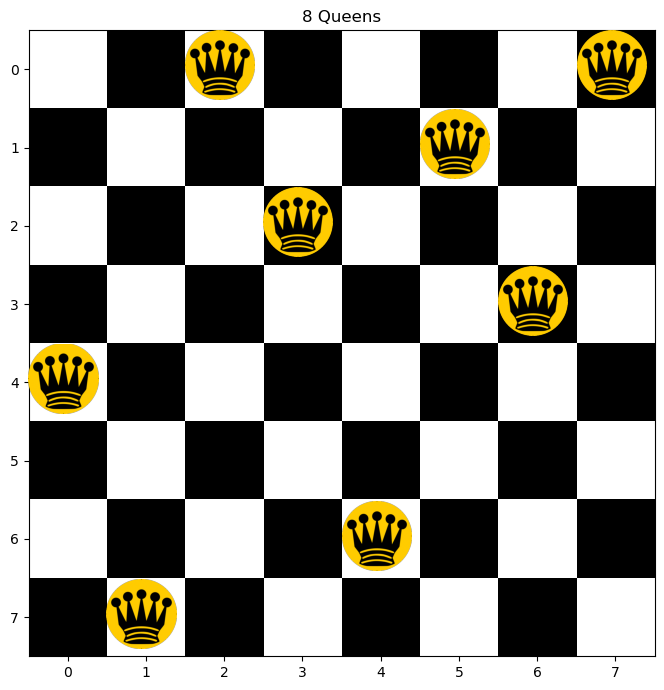

In [21]:
def hill_climbing_steps(problem, max_iter=100):
    states_explored = []  #listing to store all states explored during hill climbing
    current_state = problem  #initializing with the provided starting state
    for _ in range(max_iter):
        current_conflicts = conflicts(current_state)
        states_explored.append(current_state.copy())  #adding current state to the list
        if current_conflicts == 0:
            return states_explored  #solution explored
        next_states = successor(current_state)
        next_states_with_conflicts = [(s, conflicts(s)) for s in next_states]
        next_states_with_conflicts.sort(key=lambda x: x[1])  #sorting by number of conflicts
        best_next_state, best_next_state_conflicts = next_states_with_conflicts[0]
        if best_next_state_conflicts >= current_conflicts:
            return states_explored  #local minimum found
        current_state = best_next_state  #moving to the best neighbor
    return states_explored

random.seed(42)  #random seed
initial_state = [random.randint(0, 7) for _ in range(8)] #generating random states
states_explored = hill_climbing_steps(initial_state)
for i, state in enumerate(states_explored):
    plot_NQueens(state)

## Stochastic Hill Climb:

C:\Users\gamer\AppData\Local\Temp\ipykernel_11112\2925873213.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


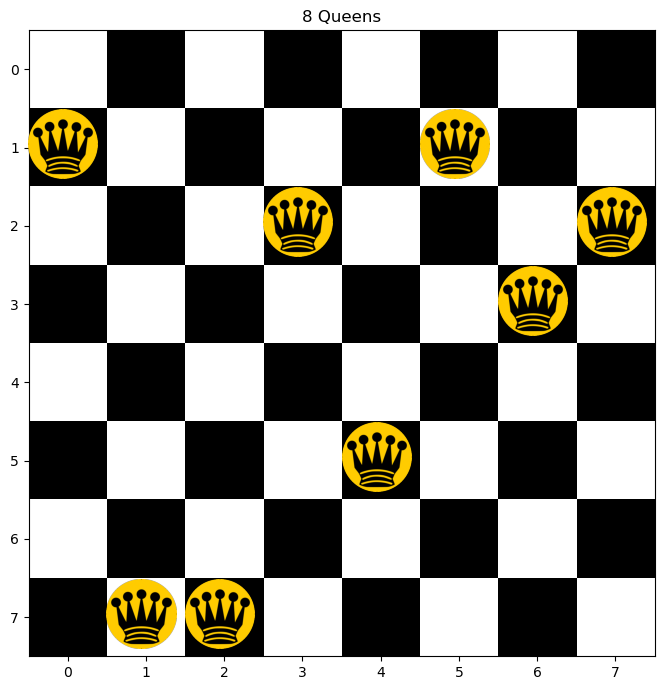

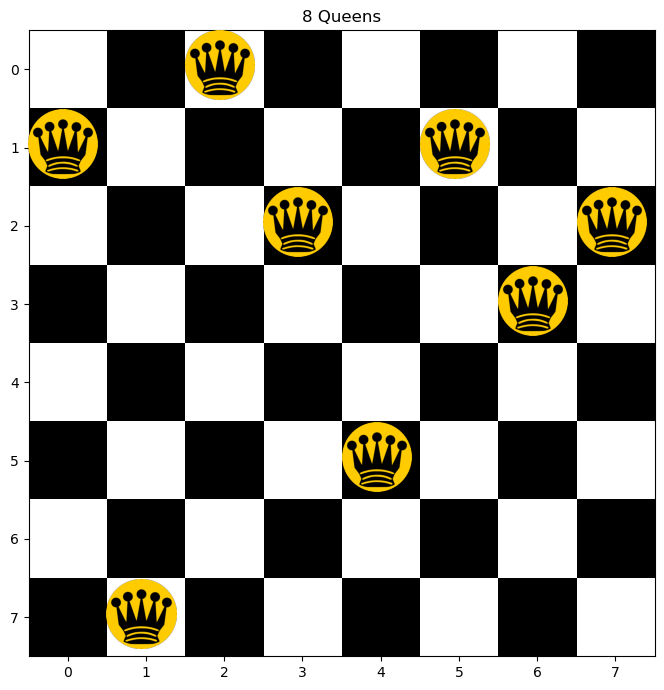

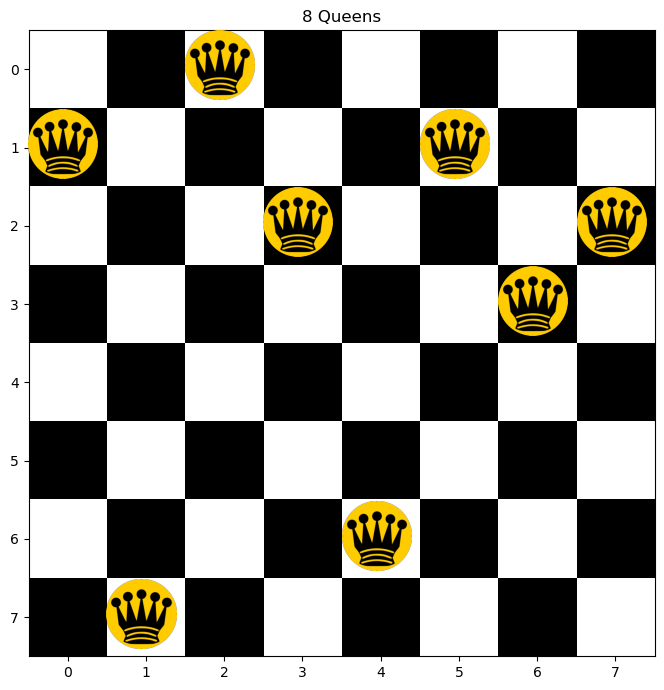

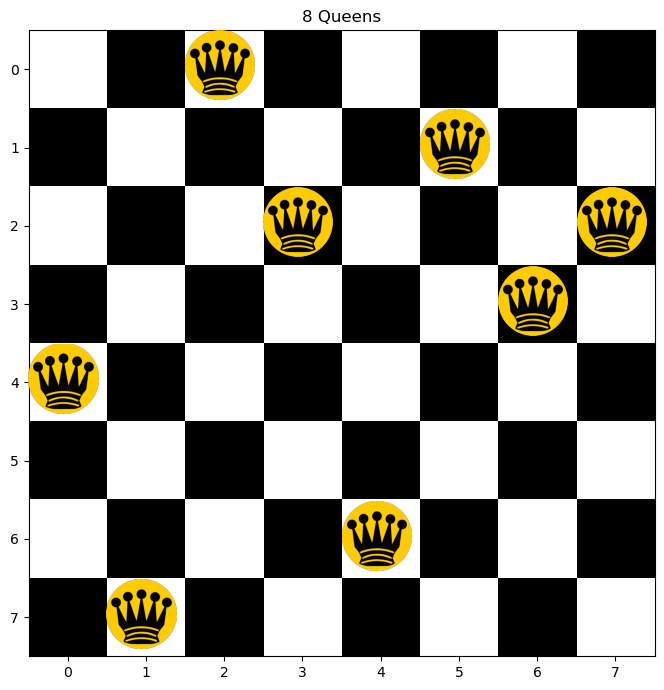

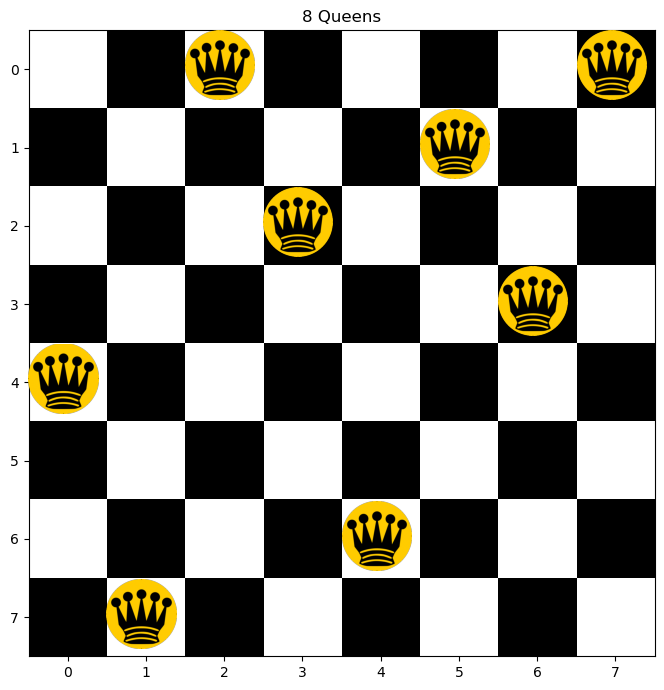

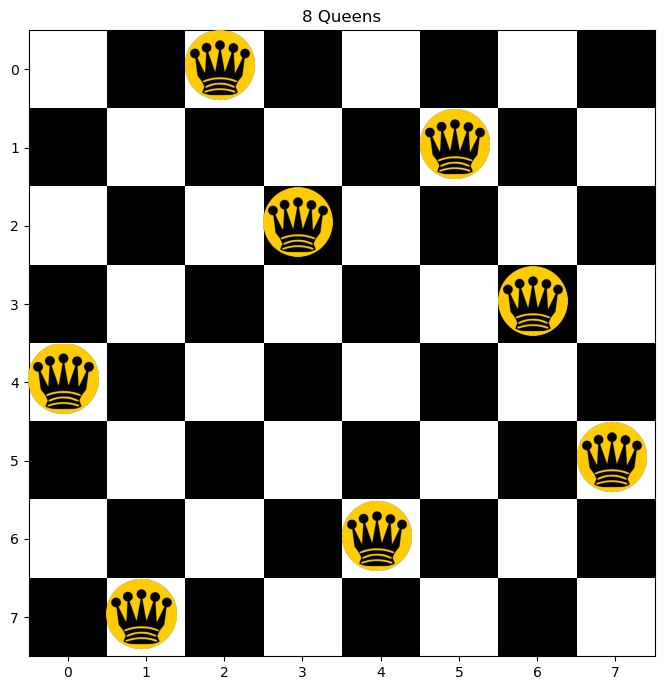

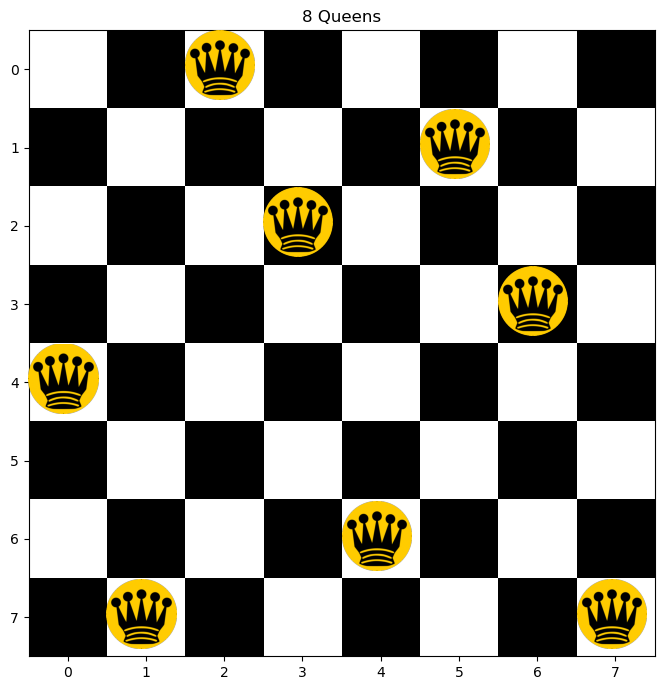

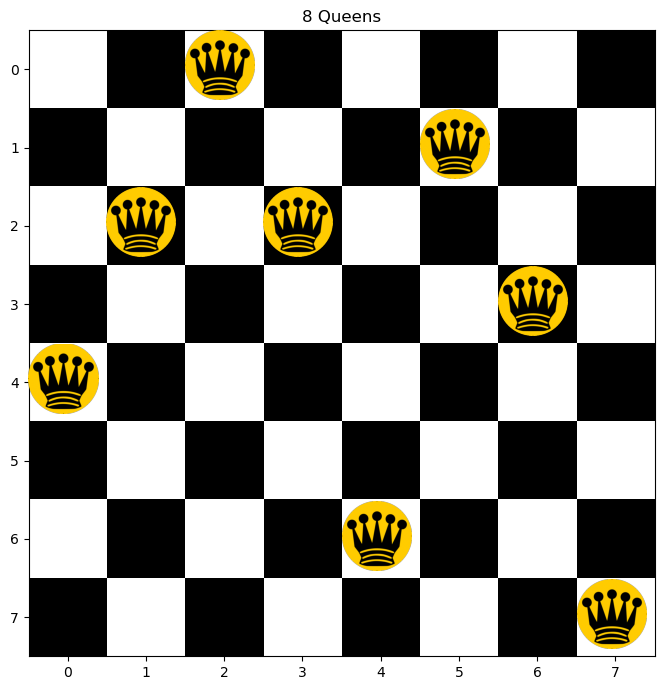

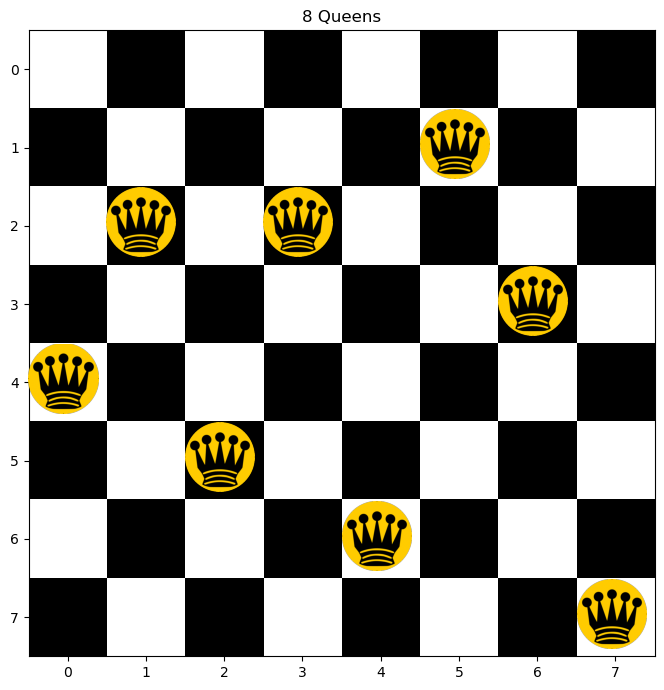

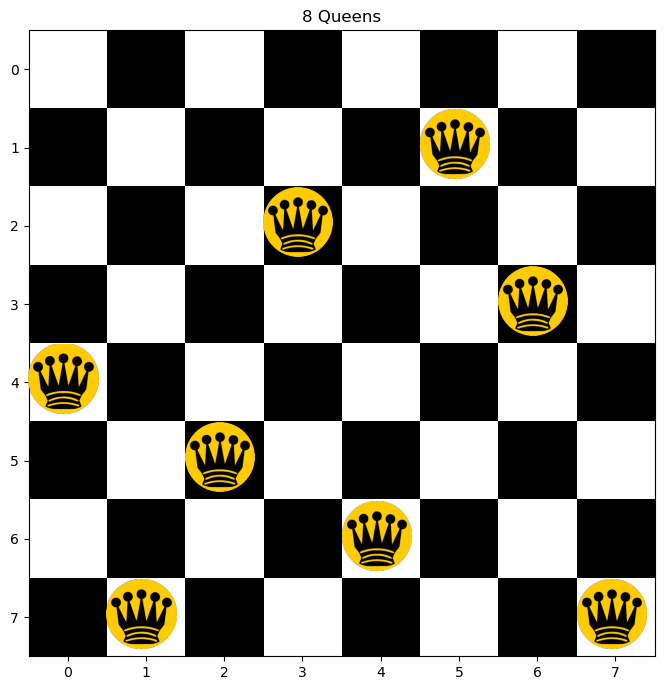

In [32]:
def stochastic_hill_climbing_steps(initial_state, max_iter=10):
    states_explored = []  #listing to store all states explored during hill climbing
    current_state = initial_state[:]  #initializing with the provided starting state
    for _ in range(max_iter):
        current_conflicts = conflicts(current_state)
        states_explored.append(current_state.copy())  #adding current state to the list
        if current_conflicts == 0:
            return states_explored  #solution found
        next_states = successor(current_state)
        next_states_with_conflicts = [(s, conflicts(s)) for s in next_states]
        next_states_with_conflicts.sort(key=lambda x: x[1])  #sorting by number of conflicts
        best_next_state, best_next_state_conflicts = next_states_with_conflicts[0]
        if best_next_state_conflicts == current_conflicts:
            candidates = [s for s, c in next_states_with_conflicts if c == best_next_state_conflicts]
            current_state = random.choice(candidates)
        elif best_next_state_conflicts < current_conflicts:
            current_state = best_next_state  #moving to the best neighbor
    return states_explored

random.seed(999) #random seed
initial_state = [random.randint(0, 7) for _ in range(8)]
states_explored = stochastic_hill_climbing_steps(initial_state)

for i, state in enumerate(states_explored):
    plot_NQueens(state)

C:\Users\gamer\AppData\Local\Temp\ipykernel_11112\1775259252.py:18: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp(-delta_E / current_temp)


Initial State:


C:\Users\gamer\AppData\Local\Temp\ipykernel_11112\2925873213.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


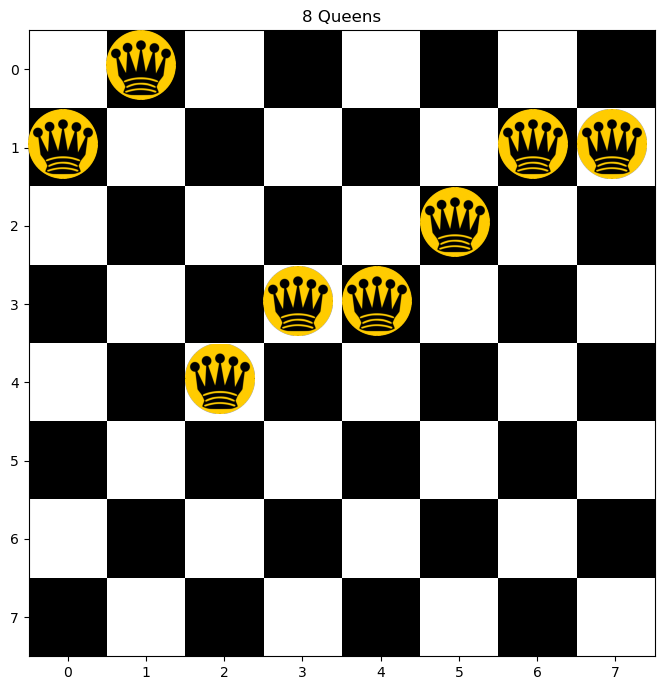

Final State:


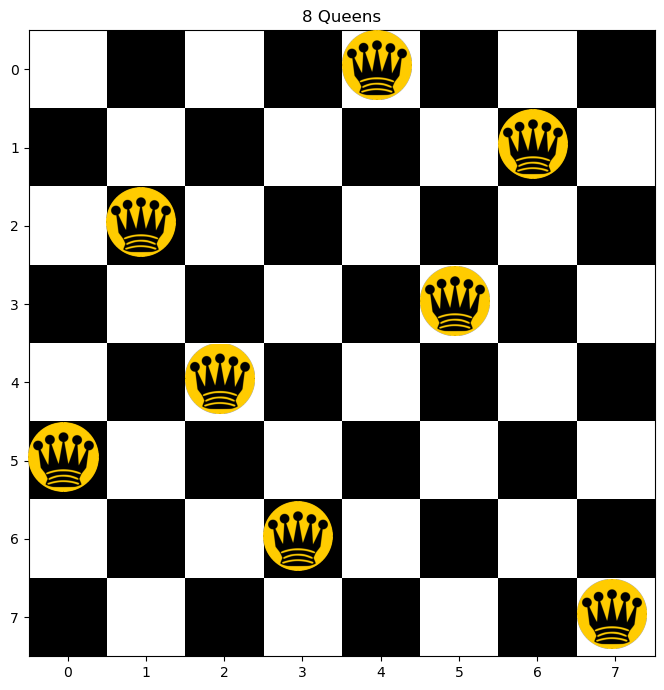

In [8]:
def simulated_annealing_steps(n, max_iter=1000, initial_temp=1000, cooling_rate=0.95, seed=None):
    if seed is not None:
        random.seed(seed)
    
    current_state = [random.randint(0, n - 1) for _ in range(n)]  
    current_temp = initial_temp
    
    for _ in range(max_iter):
        current_conflicts = conflicts(current_state)
        if current_conflicts == 0:
            return [current_state.copy()]  #solution found
        
        next_states = successor(current_state)
        next_states_with_conflicts = [(s, conflicts(s)) for s in next_states]
        next_state, next_conflicts = random.choice(next_states_with_conflicts)
        
        delta_E = next_conflicts - current_conflicts
        acceptance_prob = np.exp(-delta_E / current_temp)
        
        if delta_E < 0 or random.random() < acceptance_prob:
            current_state = next_state
            
        current_temp *= cooling_rate

    return []  #returning an empty list if no solution is found within max_iter iterations

n = 8  #number of queens
seed_value = 42   #random seed value
states_explored = simulated_annealing_steps(n, seed=seed_value)
print('Initial State:')
plot_NQueens(initial_state)
print('Final State:')
for i, state in enumerate(states_explored):
    plot_NQueens(state)

* To see all the steps of simulated annealing:

In [ ]:
def simulated_annealing_steps(n, max_iter=100, initial_temp=1000, cooling_rate=0.95, seed=None):
    if seed is not None:
        random.seed(seed)
    
    states_explored = []
    
    current_state = [random.randint(0, n - 1) for _ in range(n)]  
    current_temp = initial_temp
    
    for _ in range(max_iter):
        current_conflicts = conflicts(current_state)
        states_explored.append(current_state.copy())
        
        if current_conflicts == 0:
            return states_explored
        
        next_states = successor(current_state)
        next_states_with_conflicts = [(s, conflicts(s)) for s in next_states]
        next_state, next_conflicts = random.choice(next_states_with_conflicts)
        
        delta_E = next_conflicts - current_conflicts
        acceptance_prob = np.exp(-delta_E / current_temp)
        
        if delta_E < 0 or random.random() < acceptance_prob:
            current_state = next_state
            
        current_temp *= cooling_rate

    return states_explored

n = 8
seed_value = 7
states_explored = simulated_annealing_steps(n, seed=seed_value)

for i, state in enumerate(states_explored):
    plot_NQueens(state)